# 2주차 퀴즈

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

## 1번

In [13]:
medic = df[df["상권업종소분류명"]=="약국"]
medic["시도명"].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

## 2번

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')
plt.rc('axes',unicode_minus=False)

%matplotlib inline

<AxesSubplot:xlabel='경도', ylabel='위도'>

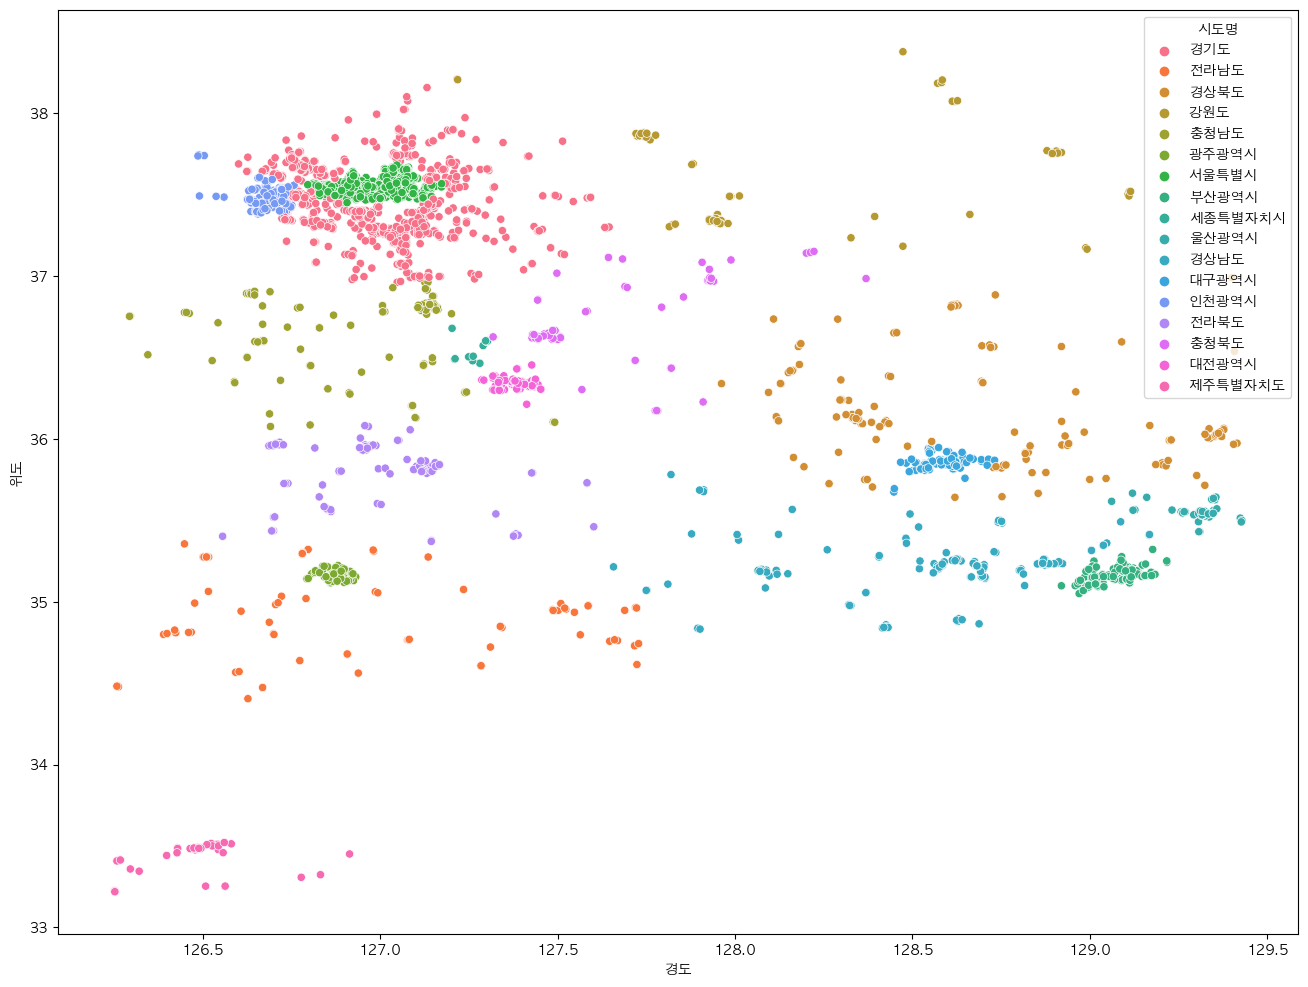

In [31]:
animal_medic = df[df["상권업종소분류명"]=="동물병원"]
plt.figure(figsize=(16,12))
animal_medic["시도명"].value_counts()
sns.scatterplot(data=animal_medic, x="경도", y="위도",hue="시도명")


## 3번

In [216]:
# 서울특별시에 있는 병원 값 
seoul_hos = df[(df["시도명"]=="서울특별시") & (df["상권업종중분류명"] == "병원")]
seoul_not_pla = seoul_hos["시군구명"].value_counts()

# 서울특별시에 있는 성형|피부 병원 값 
seoul_hos_plastic = seoul_hos[seoul_hos["상권업종소분류명"].str.contains("성형|피부")]
seoul_hos_plastic_gu = seoul_hos_plastic["시군구명"].value_counts()


s = seoul_hos_plastic_gu/seoul_not_pla
s.sort_values(ascending=False).round(2)


강남구     0.24
서초구     0.17
마포구     0.09
서대문구    0.08
영등포구    0.08
강동구     0.07
중구      0.07
중랑구     0.07
강서구     0.07
양천구     0.07
송파구     0.06
광진구     0.06
은평구     0.06
성북구     0.06
구로구     0.06
금천구     0.05
노원구     0.05
성동구     0.05
강북구     0.05
용산구     0.05
관악구     0.04
동대문구    0.04
동작구     0.04
종로구     0.03
도봉구     0.02
Name: 시군구명, dtype: float64

## 4번

In [52]:
import folium

x = old["위도"].mean()
y = old["경도"].mean()
map = folium.Map(location = [x, y], zoom_start=7)

old = df[df["상권업종소분류명"] == "노인/치매병원"]
for n in old.index:
    name = old.loc[n,"상호명"]
    popup = f"{name}"
    location = [old.loc[n,"위도"],old.loc[n,"경도"]]
    folium.Marker(
        location = location, 
        popup = popup
    ).add_to(map)
map